In [12]:
import numpy as np
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

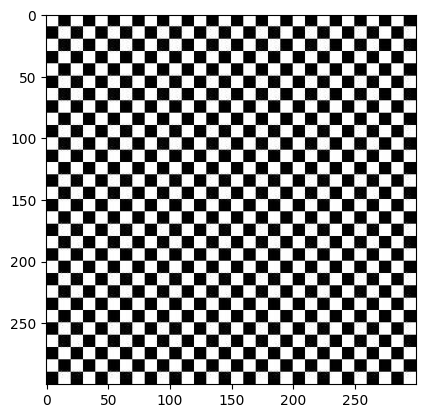

In [13]:
image = cv2.imread('../data/checkboard_pattern.jpg', 0)
plt.imshow(image, cmap='gray')

IMG_DIMS = image.shape
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)

Region with focal radius : 10




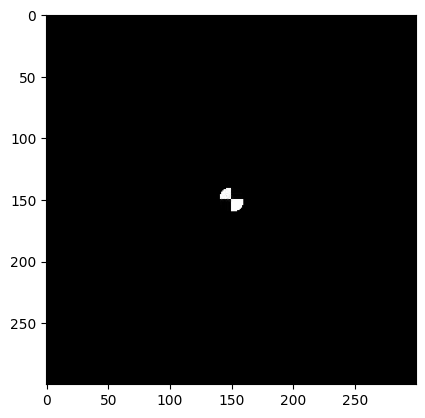

image with focal point at center initially


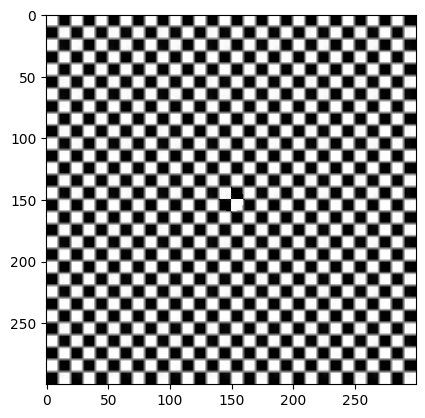

Variance image


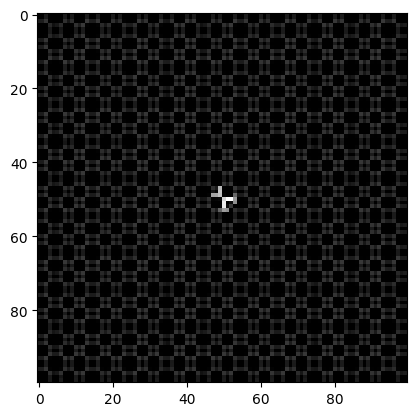

In [14]:
blurred_image = cv2.GaussianBlur(image, (3, 3), 10)
fr = 10
mask = np.zeros(IMG_DIMS, dtype=np.uint8)
non_blurred_region = cv2.circle(mask, CENTER, 10, (255, 255, 255), -1)
non_blurred_region = cv2.bitwise_and(non_blurred_region, image)
print('Region with focal radius : ' + str(fr) + '\n\n')
plt.imshow(non_blurred_region, cmap='gray')
plt.show()

blurred_image_copy = blurred_image.copy()
blurred_image_copy = cv2.circle(blurred_image_copy, CENTER, 10, (0, 0, 0), -1)
image = blurred_image_copy +  non_blurred_region

print('image with focal point at center initially')
plt.imshow(image, cmap='gray')
plt.show()

laplacian_filter_8 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edge_mask = cv2.filter2D(image, -1, laplacian_filter_8)

variances = []
for x in range(0, IMG_DIMS[0]//3):
    for y in range(0, IMG_DIMS[1]//3):
        i = x * 3
        j = y * 3
        variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
        edge_mask[i+1,j+2]
        ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

print('Variance image')
variance_image = np.array(variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)
plt.imshow(abs(variance_image), cmap='gray')

Region with focal radius : 20




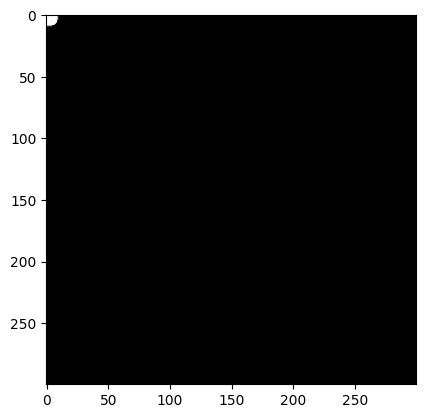

Test image with radius  20  being sharp with rest as blurred


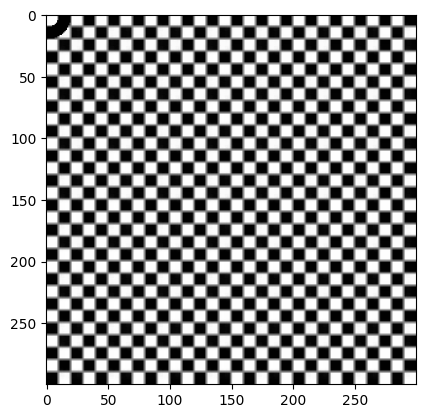

difference in test image and filtered non blurred region (in circular fasion)


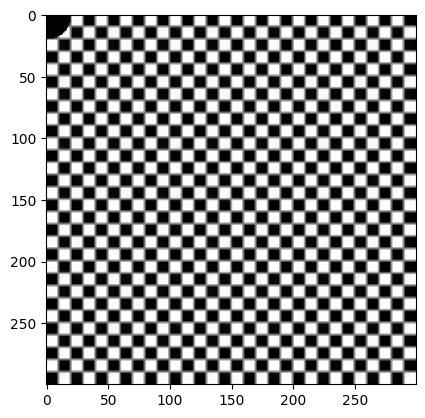

Visualization of separation of non blurred and blurred parts (radius = fr)


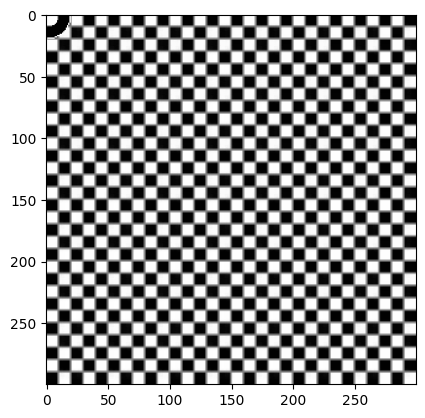

Laplacian Edge Mask


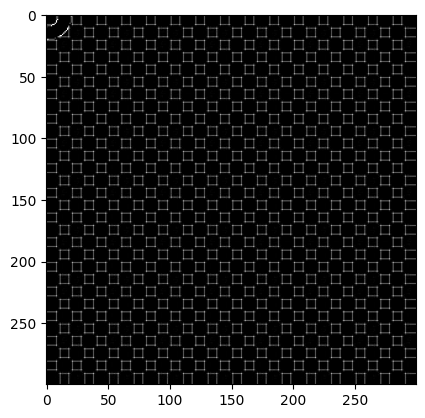

L O G edge mask


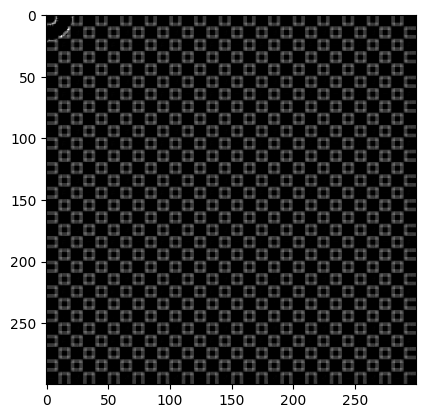

Variance mask : 


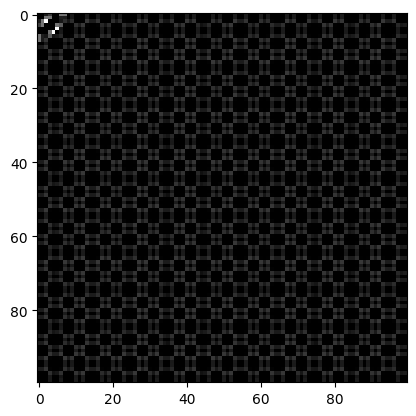

difference in variance maps


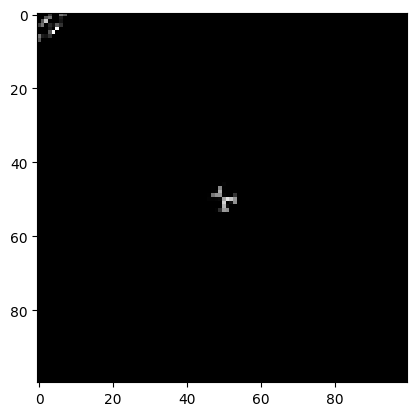

[[[49 47]]

 [[47 49]]

 [[48 50]]

 [[49 50]]

 [[50 51]]

 [[50 52]]

 [[49 53]]

 [[51 53]]

 [[51 52]]

 [[52 51]]

 [[53 51]]

 [[53 49]]

 [[52 50]]

 [[50 50]]

 [[49 49]]]
(151, 144)  are the new centers 
predicted center of the new focal length is highlighed in red


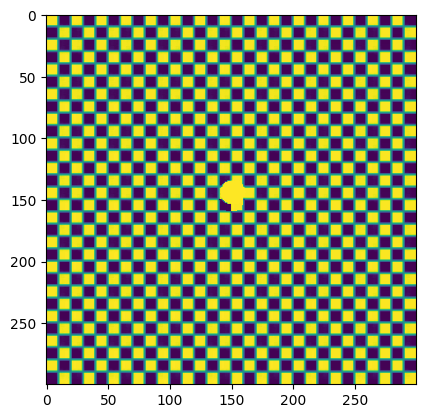

Predicted translation of focal point :  1 -6
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  145.6639969244288
Angle :  -0.7853981633974482
[[[50 51]]

 [[51 50]]

 [[52 51]]

 [[51 52]]]
(154, 151)  are the new centers 
predicted center of the new focal length is highlighed in red


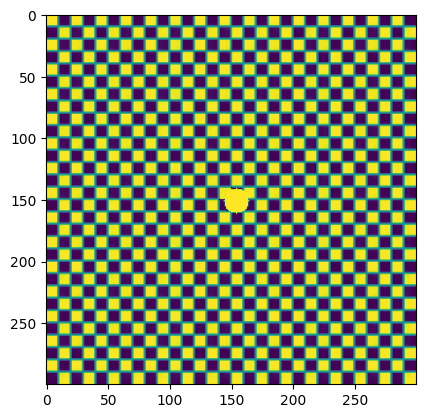

Predicted translation of focal point :  4 1
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  141.4213562373095
Angle :  -0.7853981633974482
[[[3 0]]

 [[0 3]]

 [[1 3]]

 [[2 2]]

 [[3 3]]

 [[3 5]]

 [[2 6]]

 [[0 6]]

 [[0 7]]

 [[1 6]]

 [[3 6]]

 [[6 3]]

 [[6 1]]

 [[7 0]]

 [[6 0]]

 [[6 2]]

 [[5 3]]

 [[3 3]]

 [[2 2]]

 [[3 1]]]
(12, 4)  are the new centers 
predicted center of the new focal length is highlighed in red


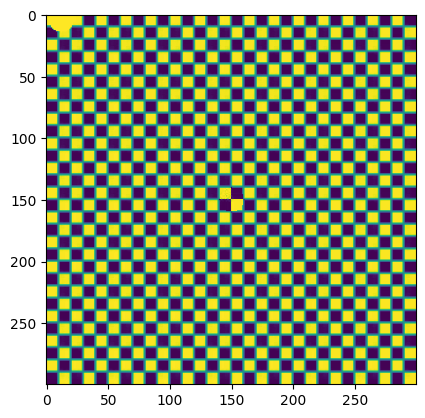

Predicted translation of focal point :  -138 -146
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  212.13203435596427
Angle :  -0.7853981633974482
[[[3 4]]

 [[4 3]]

 [[5 4]]

 [[4 5]]]
(13, 10)  are the new centers 
predicted center of the new focal length is highlighed in red


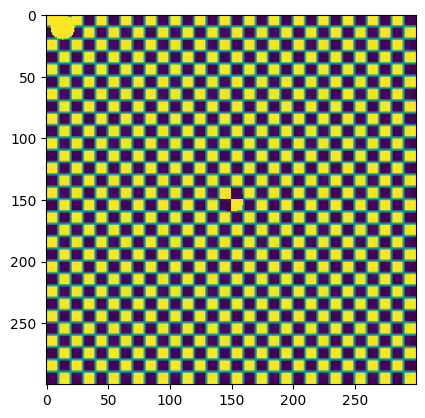

Predicted translation of focal point :  -137 -140
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  207.88939366884497
Angle :  -0.7853981633974484
Region with focal radius : 20




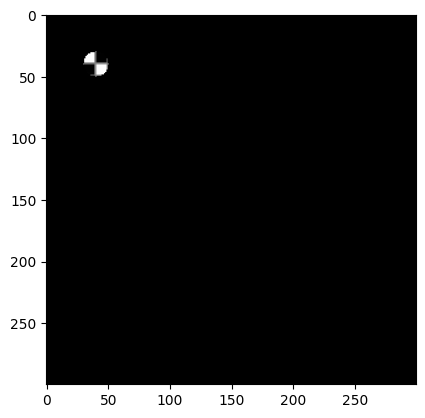

Test image with radius  20  being sharp with rest as blurred


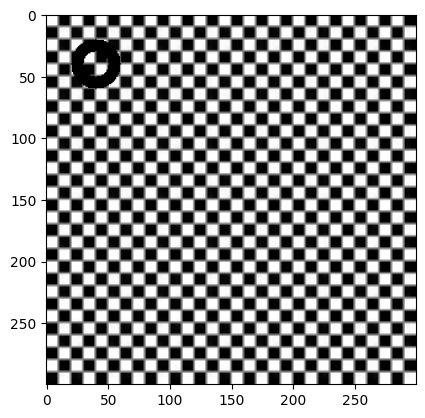

difference in test image and filtered non blurred region (in circular fasion)


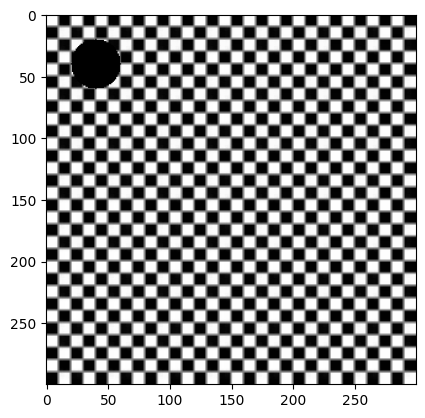

Visualization of separation of non blurred and blurred parts (radius = fr)


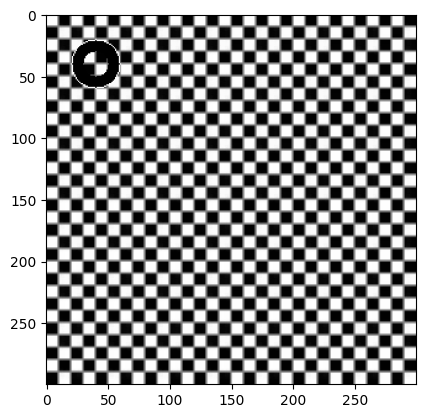

Laplacian Edge Mask


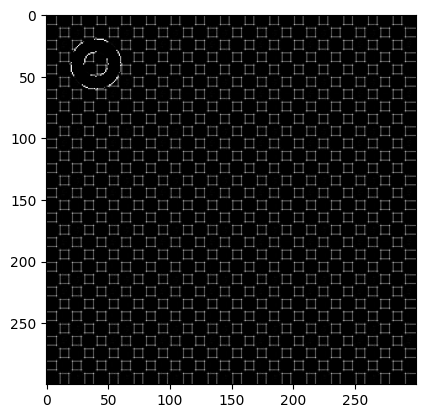

L O G edge mask


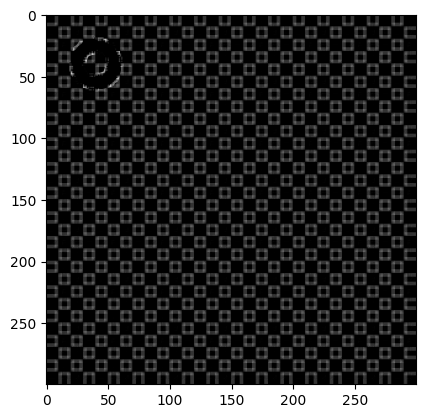

Variance mask : 


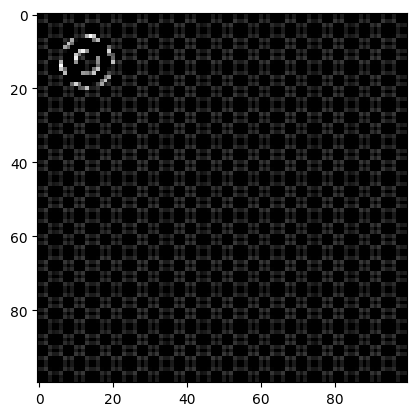

difference in variance maps


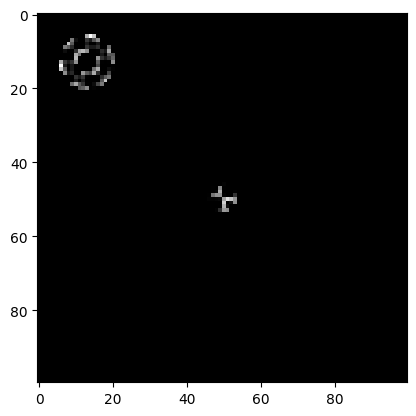

[[[49 47]]

 [[47 49]]

 [[48 50]]

 [[49 50]]

 [[50 51]]

 [[50 52]]

 [[49 53]]

 [[51 53]]

 [[51 52]]

 [[52 51]]

 [[53 51]]

 [[53 49]]

 [[52 50]]

 [[50 50]]

 [[49 49]]]
(151, 144)  are the new centers 
predicted center of the new focal length is highlighed in red


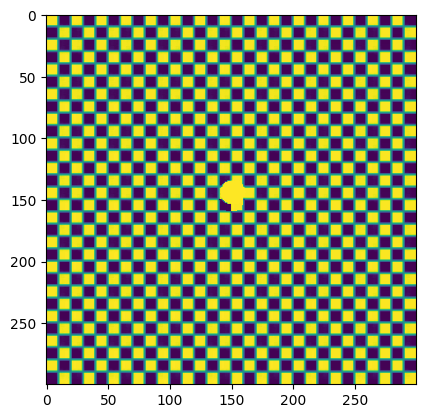

Predicted translation of focal point :  1 -6
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  145.6639969244288
Angle :  -0.7853981633974482
[[[50 51]]

 [[51 50]]

 [[52 51]]

 [[51 52]]]
(154, 151)  are the new centers 
predicted center of the new focal length is highlighed in red


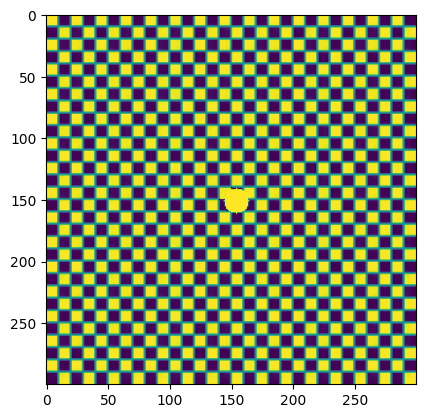

Predicted translation of focal point :  4 1
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  141.4213562373095
Angle :  -0.7853981633974482
[[[13  6]]

 [[13  9]]

 [[12 10]]

 [[10 10]]

 [[ 9  9]]

 [[ 9  8]]

 [[10  7]]

 [[ 9  7]]

 [[ 7  9]]

 [[ 7 10]]

 [[ 8  9]]

 [[ 9  9]]

 [[10 10]]

 [[10 12]]

 [[ 9 13]]

 [[ 6 13]]

 [[ 6 15]]

 [[ 7 16]]

 [[ 9 16]]

 [[10 17]]

 [[10 18]]

 [[ 9 19]]

 [[10 19]]

 [[11 20]]

 [[13 20]]

 [[12 19]]

 [[12 17]]

 [[13 16]]

 [[16 16]]

 [[17 17]]

 [[17 18]]

 [[16 19]]

 [[15 19]]

 [[17 19]]

 [[19 17]]

 [[19 15]]

 [[19 16]]

 [[18 17]]

 [[17 17]]

 [[16 16]]

 [[16 13]]

 [[17 12]]

 [[19 12]]

 [[20 13]]

 [[20 11]]

 [[19 10]]

 [[19  9]]

 [[18 10]]

 [[17 10]]

 [[16  9]]

 [[16  7]]

 [[15  6]]]
(40, 25)  are the new centers 
predicted center of the new focal length is highlighed in red


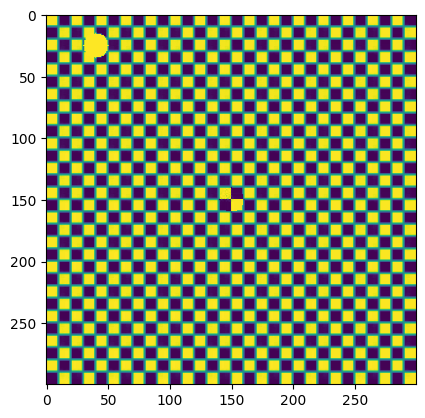

Predicted translation of focal point :  -110 -125
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  203.64675298172568
Angle :  -0.7853981633974484
[[[10 18]]

 [[11 17]]

 [[12 18]]

 [[11 19]]]
(34, 52)  are the new centers 
predicted center of the new focal length is highlighed in red


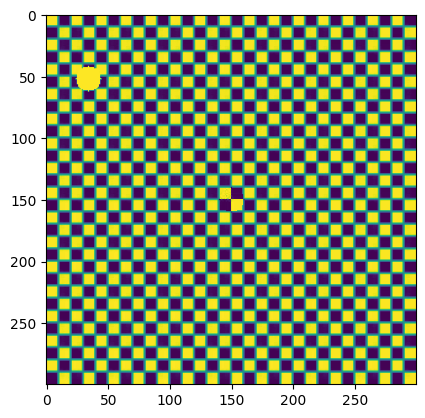

Predicted translation of focal point :  -116 -98
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  193.1035991378721
Angle :  -0.7597627548757708
[[[ 7 14]]

 [[ 8 13]]

 [[ 9 14]]

 [[ 9 15]]

 [[ 8 16]]

 [[ 7 15]]]
(25, 41)  are the new centers 
predicted center of the new focal length is highlighed in red


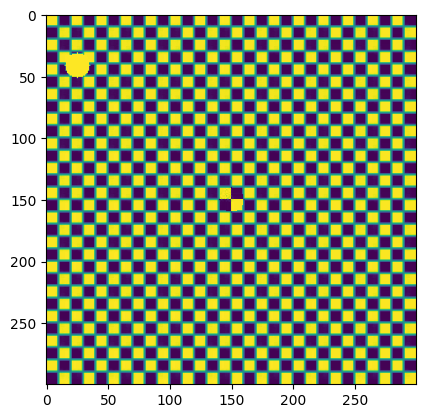

Predicted translation of focal point :  -125 -109
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  198.0353503796734
Angle :  -0.7639728709489136
[[[17 11]]

 [[18 10]]

 [[19 11]]

 [[18 12]]]
(55, 31)  are the new centers 
predicted center of the new focal length is highlighed in red


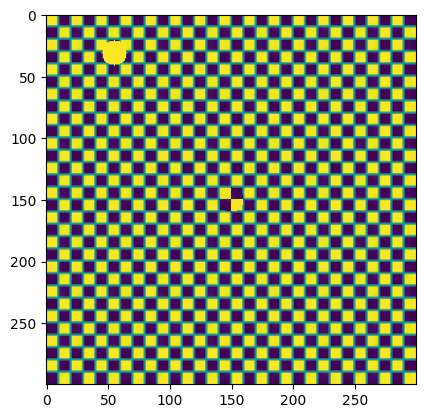

Predicted translation of focal point :  -95 -119
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  193.1035991378721
Angle :  -0.8110335719191258
[[[13 10]]

 [[14  9]]

 [[16  9]]

 [[17 10]]

 [[17 11]]

 [[16 12]]

 [[16 14]]

 [[14 16]]

 [[12 16]]

 [[11 17]]

 [[10 17]]

 [[ 9 16]]

 [[ 9 14]]

 [[10 13]]

 [[10 12]]

 [[12 10]]]
(40, 31)  are the new centers 
predicted center of the new focal length is highlighed in red


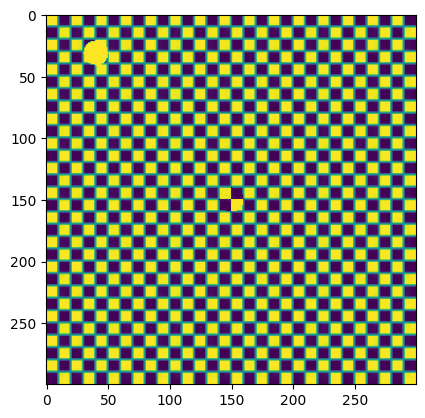

Predicted translation of focal point :  -110 -119
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  199.4041122946064
Angle :  -0.7853981633974484
[[[13  8]]

 [[14  7]]

 [[15  7]]

 [[16  8]]

 [[15  9]]

 [[14  9]]]
(45, 22)  are the new centers 
predicted center of the new focal length is highlighed in red


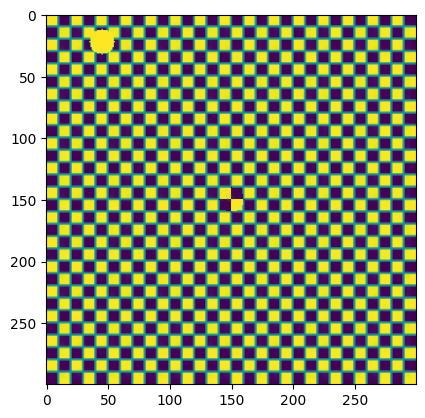

Predicted translation of focal point :  -105 -128
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  198.0353503796734
Angle :  -0.8068234558459828
Region with focal radius : 20




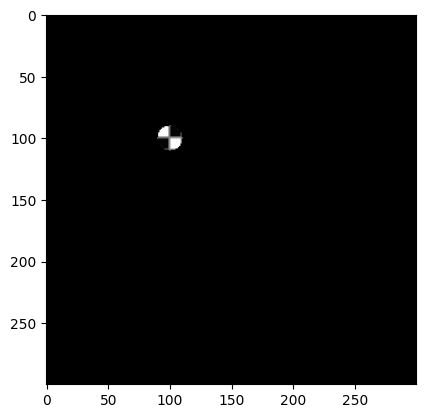

Test image with radius  20  being sharp with rest as blurred


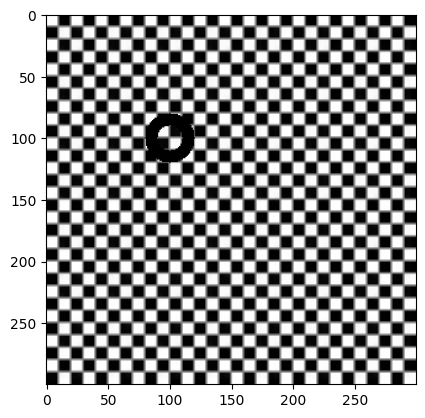

difference in test image and filtered non blurred region (in circular fasion)


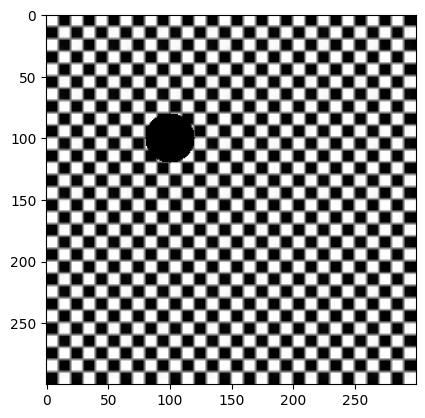

Visualization of separation of non blurred and blurred parts (radius = fr)


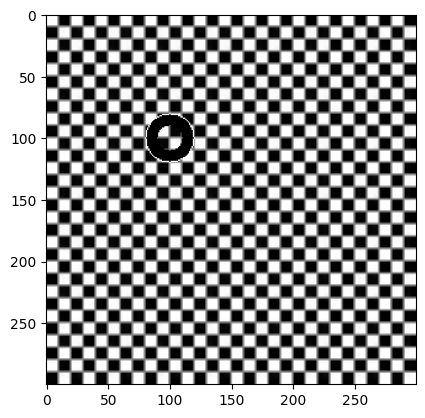

Laplacian Edge Mask


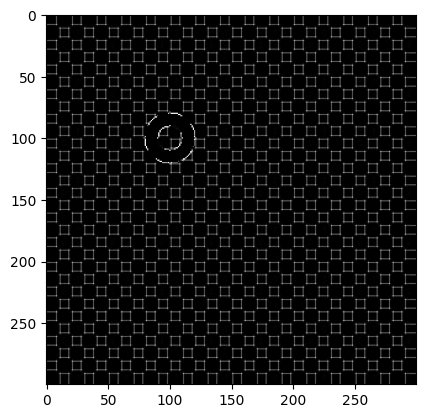

L O G edge mask


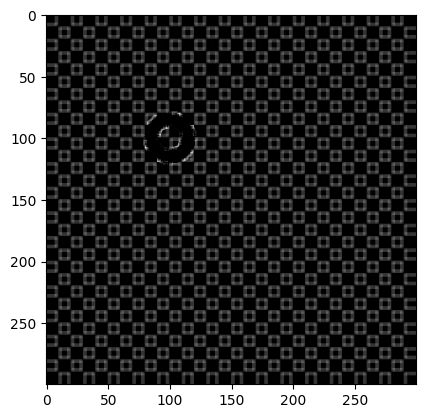

Variance mask : 


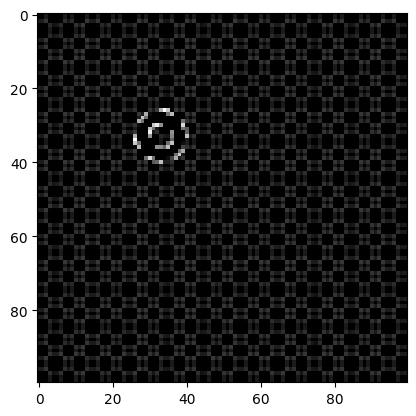

difference in variance maps


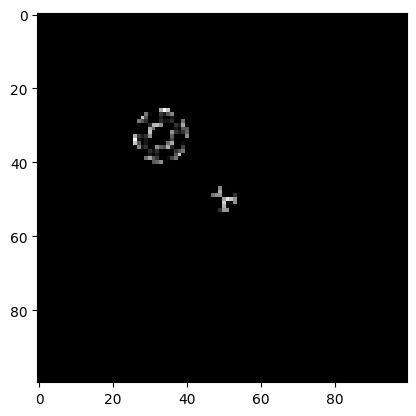

[[[49 47]]

 [[47 49]]

 [[48 50]]

 [[49 50]]

 [[50 51]]

 [[50 52]]

 [[49 53]]

 [[51 53]]

 [[51 52]]

 [[52 51]]

 [[53 51]]

 [[53 49]]

 [[52 50]]

 [[50 50]]

 [[49 49]]]
(151, 144)  are the new centers 
predicted center of the new focal length is highlighed in red


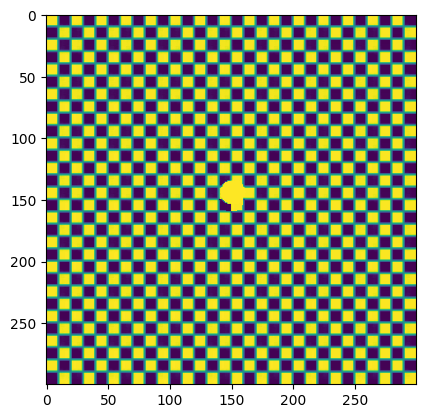

Predicted translation of focal point :  1 -6
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  145.6639969244288
Angle :  -0.7853981633974482
[[[50 51]]

 [[51 50]]

 [[52 51]]

 [[51 52]]]
(154, 151)  are the new centers 
predicted center of the new focal length is highlighed in red


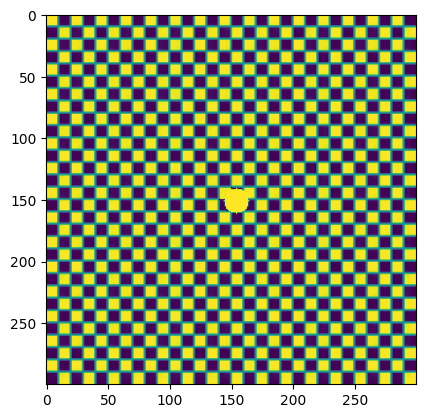

Predicted translation of focal point :  4 1
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  141.4213562373095
Angle :  -0.7853981633974482
[[[33 26]]

 [[33 29]]

 [[32 30]]

 [[30 30]]

 [[29 29]]

 [[29 28]]

 [[30 27]]

 [[29 27]]

 [[27 29]]

 [[27 30]]

 [[28 29]]

 [[29 29]]

 [[30 30]]

 [[30 32]]

 [[29 33]]

 [[26 33]]

 [[26 35]]

 [[27 36]]

 [[29 36]]

 [[30 37]]

 [[30 38]]

 [[29 39]]

 [[30 39]]

 [[31 40]]

 [[33 40]]

 [[32 39]]

 [[32 37]]

 [[33 36]]

 [[36 36]]

 [[37 37]]

 [[37 38]]

 [[36 39]]

 [[35 39]]

 [[37 39]]

 [[39 37]]

 [[39 35]]

 [[39 36]]

 [[38 37]]

 [[37 37]]

 [[36 36]]

 [[36 33]]

 [[37 32]]

 [[39 32]]

 [[40 33]]

 [[40 31]]

 [[39 30]]

 [[39 29]]

 [[38 30]]

 [[37 30]]

 [[36 29]]

 [[36 27]]

 [[35 26]]]
(100, 85)  are the new centers 
predicted center of the new focal length is highlighed in red


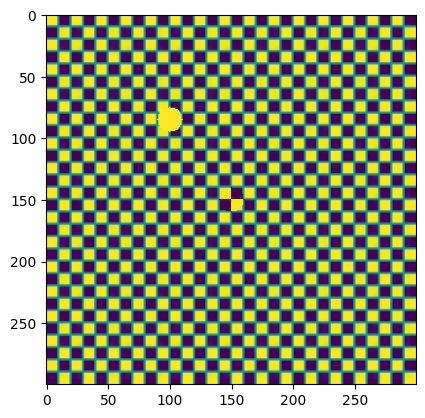

Predicted translation of focal point :  -50 -65
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  175.36248173426378
Angle :  -0.7853981633974484
[[[30 38]]

 [[31 37]]

 [[32 38]]

 [[31 39]]]
(94, 112)  are the new centers 
predicted center of the new focal length is highlighed in red


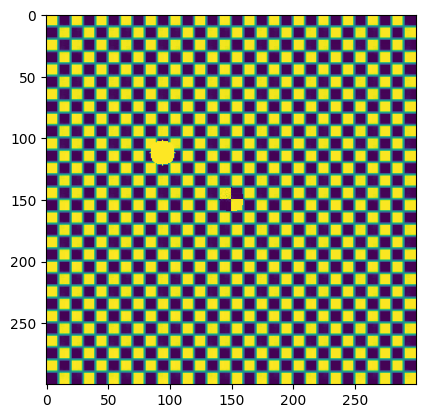

Predicted translation of focal point :  -56 -38
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  164.83021567661677
Angle :  -0.7553642787326982
[[[27 34]]

 [[28 33]]

 [[29 34]]

 [[29 35]]

 [[28 36]]

 [[27 35]]]
(85, 101)  are the new centers 
predicted center of the new focal length is highlighed in red


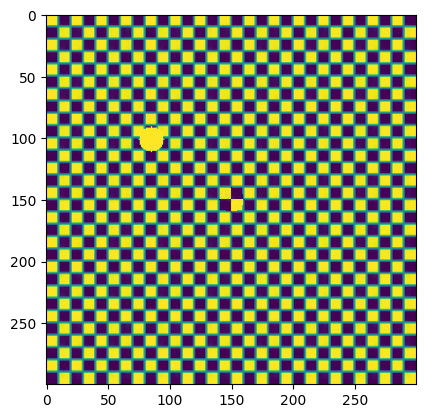

Predicted translation of focal point :  -65 -49
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  169.7586522095413
Angle :  -0.7604033697785281
[[[37 31]]

 [[38 30]]

 [[39 31]]

 [[38 32]]]
(115, 91)  are the new centers 
predicted center of the new focal length is highlighed in red


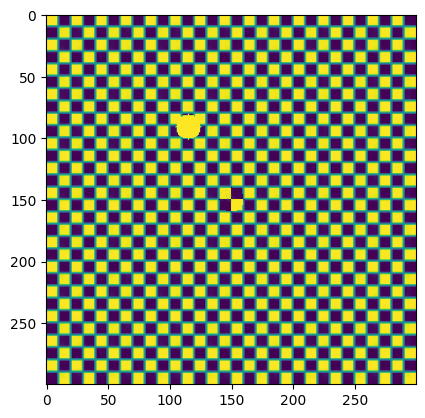

Predicted translation of focal point :  -35 -59
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  164.83021567661677
Angle :  -0.8154320480621984
[[[33 30]]

 [[34 29]]

 [[36 29]]

 [[37 30]]

 [[37 31]]

 [[36 32]]

 [[36 34]]

 [[34 36]]

 [[32 36]]

 [[31 37]]

 [[30 37]]

 [[29 36]]

 [[29 34]]

 [[30 33]]

 [[30 32]]

 [[32 30]]]
(100, 91)  are the new centers 
predicted center of the new focal length is highlighed in red


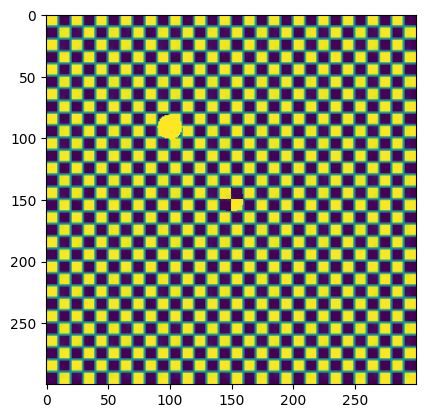

Predicted translation of focal point :  -50 -59
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  171.1198410471445
Angle :  -0.7853981633974484
[[[33 28]]

 [[34 27]]

 [[35 27]]

 [[36 28]]

 [[35 29]]

 [[34 29]]]
(105, 82)  are the new centers 
predicted center of the new focal length is highlighed in red


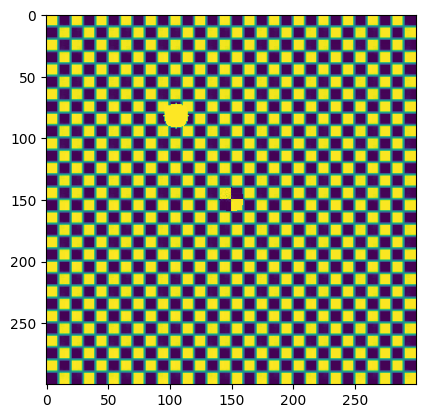

Predicted translation of focal point :  -45 -68
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  169.7586522095413
Angle :  -0.8103929570163684
Region with focal radius : 20




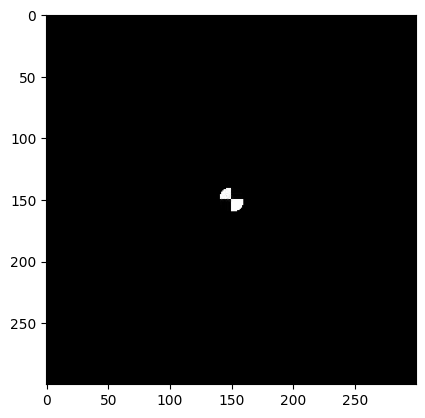

Test image with radius  20  being sharp with rest as blurred


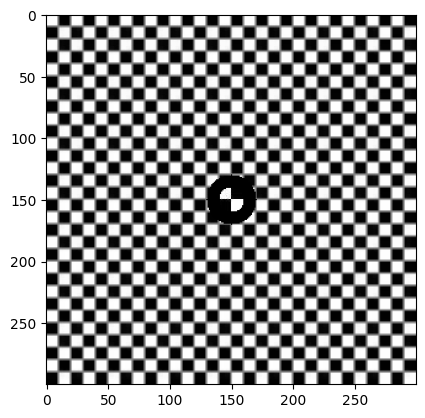

difference in test image and filtered non blurred region (in circular fasion)


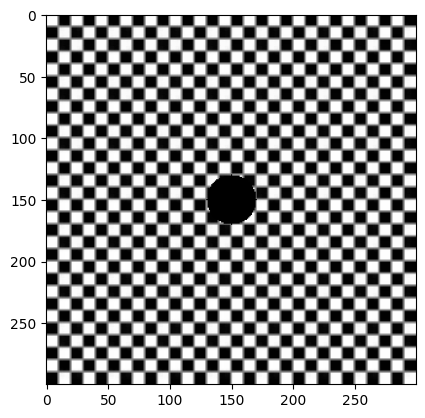

Visualization of separation of non blurred and blurred parts (radius = fr)


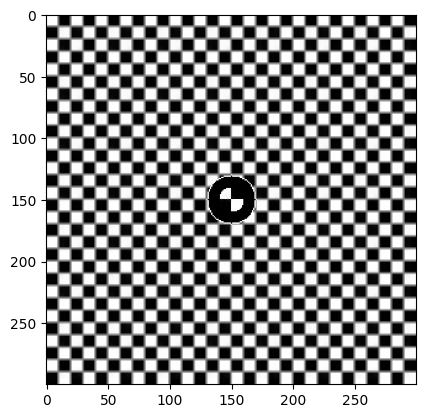

Laplacian Edge Mask


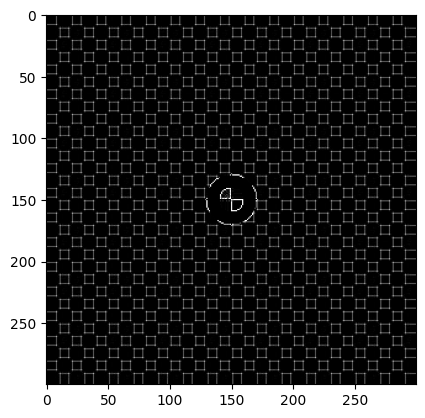

L O G edge mask


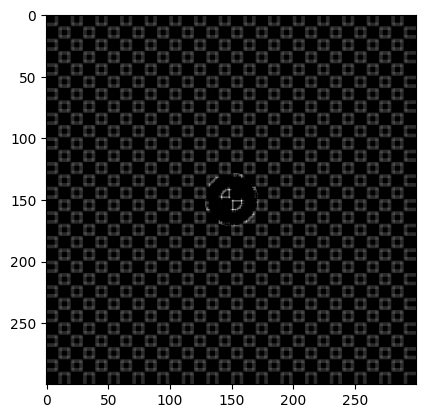

Variance mask : 


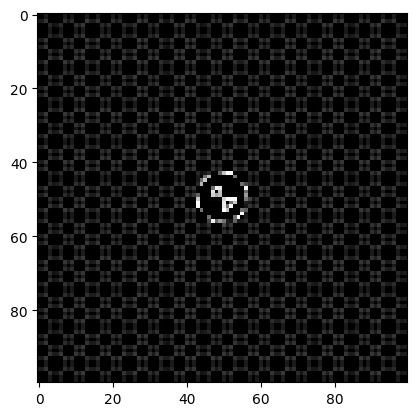

difference in variance maps


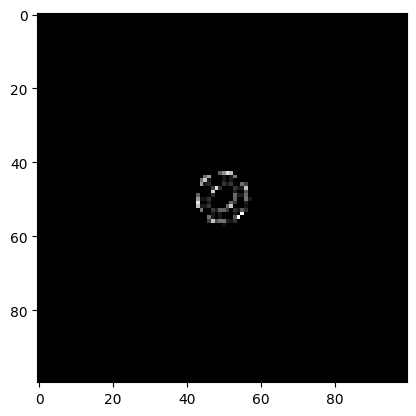

[[[49 43]]

 [[50 44]]

 [[50 46]]

 [[49 47]]

 [[47 47]]

 [[46 46]]

 [[46 44]]

 [[45 44]]

 [[44 45]]

 [[44 46]]

 [[46 46]]

 [[47 47]]

 [[47 49]]

 [[46 50]]

 [[44 50]]

 [[43 49]]

 [[43 52]]

 [[44 53]]

 [[45 52]]

 [[46 52]]

 [[47 53]]

 [[47 54]]

 [[46 55]]

 [[46 56]]

 [[49 56]]

 [[50 57]]

 [[51 56]]

 [[53 56]]

 [[56 53]]

 [[56 51]]

 [[57 50]]

 [[56 49]]

 [[56 46]]

 [[55 46]]

 [[54 47]]

 [[53 47]]

 [[52 46]]

 [[52 45]]

 [[53 44]]

 [[52 43]]]
(151, 136)  are the new centers 
predicted center of the new focal length is highlighed in red


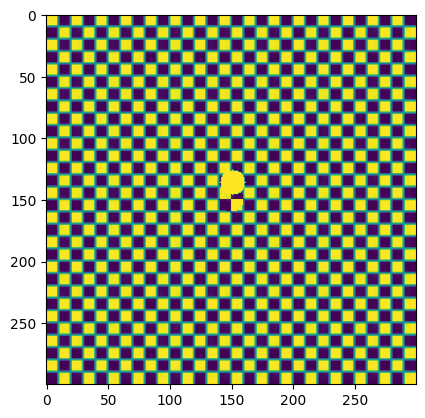

Predicted translation of focal point :  1 -14
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  151.32085117392117
Angle :  -0.7853981633974484
[[[53 54]]

 [[54 53]]

 [[55 54]]

 [[54 55]]]
(163, 160)  are the new centers 
predicted center of the new focal length is highlighed in red


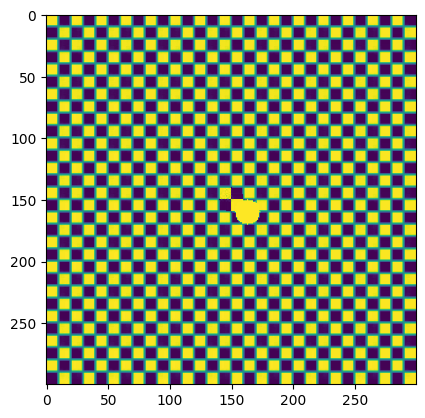

Predicted translation of focal point :  13 10
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  137.17871555019022
Angle :  -0.7853981633974484
[[[47 54]]

 [[48 53]]

 [[49 54]]

 [[49 55]]

 [[48 56]]

 [[47 55]]]
(145, 161)  are the new centers 
predicted center of the new focal length is highlighed in red


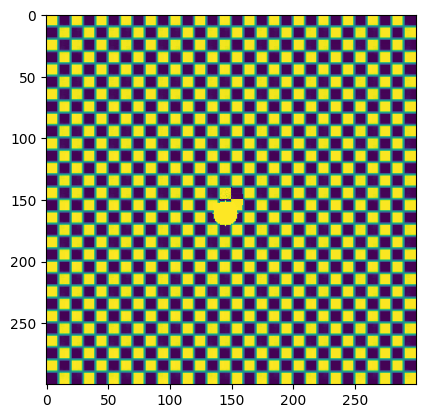

Predicted translation of focal point :  -5 11
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  141.48498153514387
Angle :  -0.7554071585405704
[[[51 53]]

 [[52 52]]

 [[53 53]]

 [[53 55]]

 [[52 56]]

 [[50 56]]

 [[49 55]]

 [[49 54]]

 [[50 53]]]
(154, 158)  are the new centers 
predicted center of the new focal length is highlighed in red


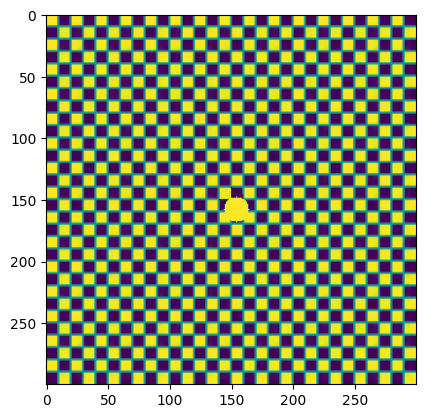

Predicted translation of focal point :  4 8
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  140.73023839957068
Angle :  -0.7703239284024889
[[[43 51]]

 [[44 50]]

 [[45 50]]

 [[46 51]]

 [[45 52]]

 [[44 52]]]
(135, 151)  are the new centers 
predicted center of the new focal length is highlighed in red


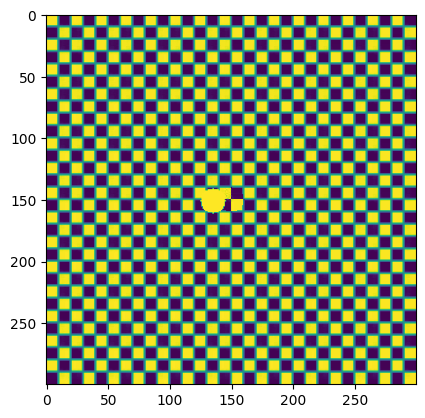

Predicted translation of focal point :  -15 1
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  146.4547711752676
Angle :  -0.7515946197039932
[[[53 50]]

 [[54 49]]

 [[55 49]]

 [[56 50]]

 [[56 52]]

 [[55 53]]

 [[53 53]]

 [[52 52]]

 [[53 51]]]
(163, 149)  are the new centers 
predicted center of the new focal length is highlighed in red


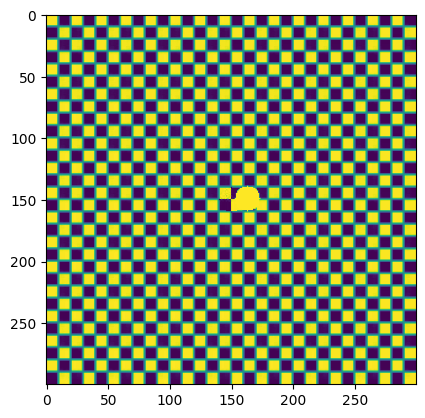

Predicted translation of focal point :  13 -1
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  140.73023839957068
Angle :  -0.8004723983924078
[[[53 48]]

 [[54 47]]

 [[55 47]]

 [[56 48]]

 [[55 49]]

 [[54 49]]]
(165, 142)  are the new centers 
predicted center of the new focal length is highlighed in red


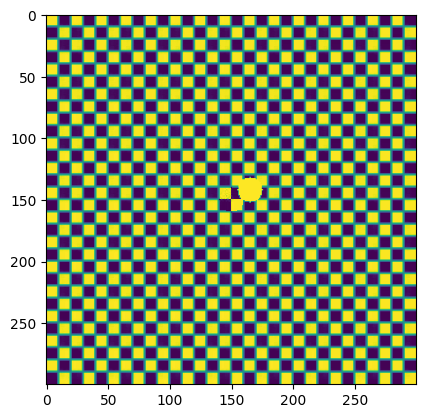

Predicted translation of focal point :  15 -8
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  141.48498153514387
Angle :  -0.8153891682543261
[[[49 47]]

 [[50 46]]

 [[52 46]]

 [[53 47]]

 [[53 50]]

 [[50 53]]

 [[47 53]]

 [[46 52]]

 [[46 50]]

 [[47 49]]

 [[47 48]]

 [[48 47]]]
(150, 142)  are the new centers 
predicted center of the new focal length is highlighed in red


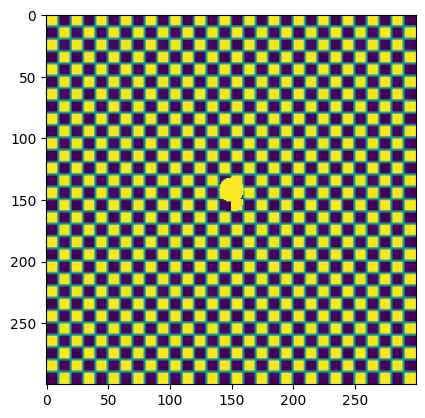

Predicted translation of focal point :  0 -8
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  147.07821048680188
Angle :  -0.7853981633974484
[[[50 44]]

 [[51 43]]

 [[52 44]]

 [[52 45]]

 [[51 46]]

 [[50 45]]]
(154, 131)  are the new centers 
predicted center of the new focal length is highlighed in red


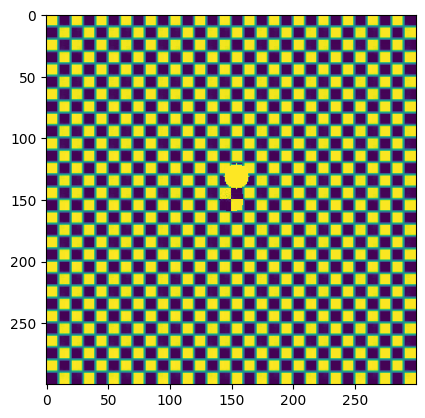

Predicted translation of focal point :  4 -19
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  146.4547711752676
Angle :  -0.8192017070909035
Region with focal radius : 20




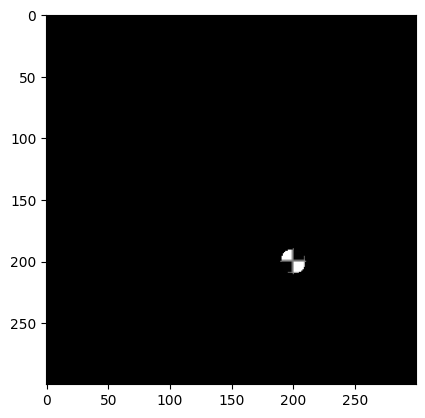

Test image with radius  20  being sharp with rest as blurred


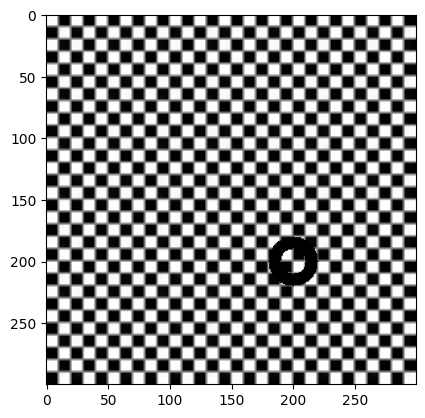

difference in test image and filtered non blurred region (in circular fasion)


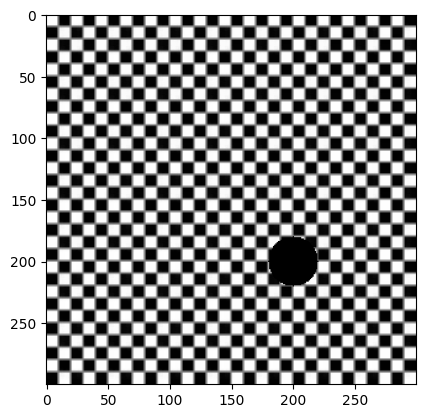

Visualization of separation of non blurred and blurred parts (radius = fr)


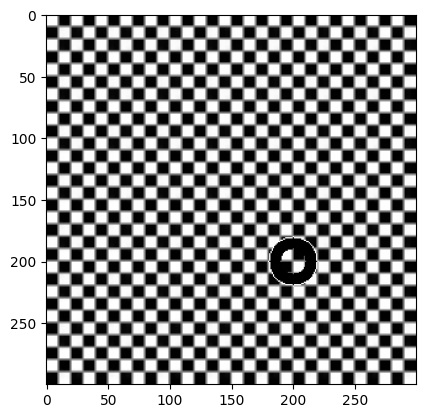

Laplacian Edge Mask


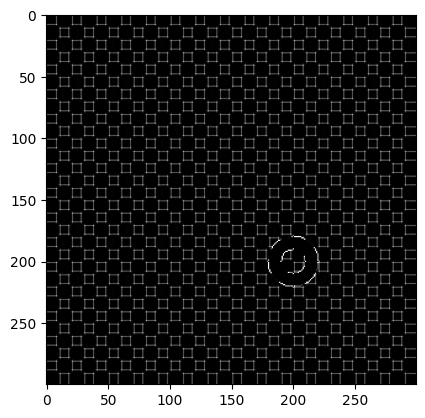

L O G edge mask


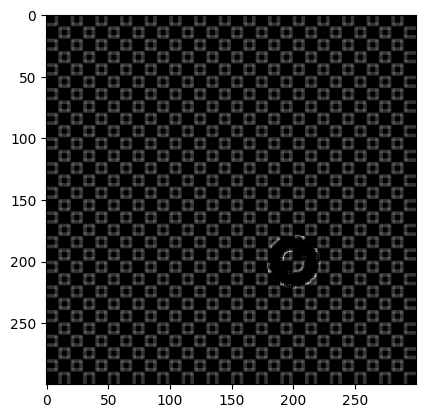

Variance mask : 


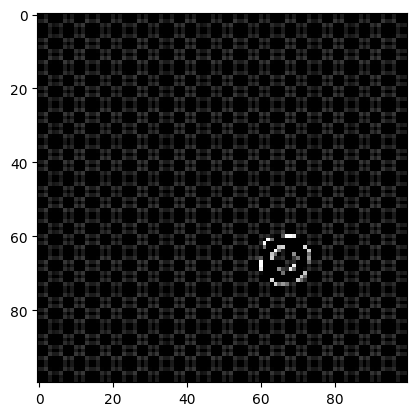

difference in variance maps


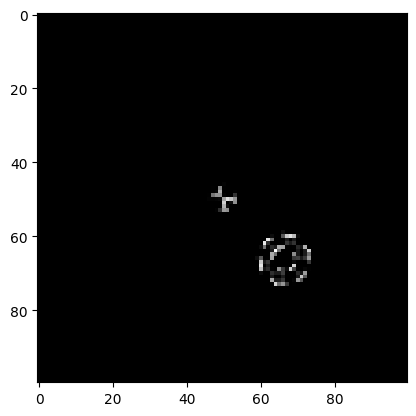

[[[66 59]]

 [[66 60]]

 [[67 61]]

 [[67 62]]

 [[66 63]]

 [[63 63]]

 [[62 62]]

 [[63 61]]

 [[63 60]]

 [[60 63]]

 [[61 63]]

 [[62 62]]

 [[63 63]]

 [[63 66]]

 [[62 67]]

 [[61 67]]

 [[60 66]]

 [[59 66]]

 [[60 67]]

 [[60 70]]

 [[61 69]]

 [[62 69]]

 [[63 70]]

 [[63 72]]

 [[64 73]]

 [[67 73]]

 [[66 72]]

 [[66 70]]

 [[67 69]]

 [[69 69]]

 [[70 70]]

 [[70 71]]

 [[69 72]]

 [[71 72]]

 [[72 71]]

 [[72 69]]

 [[71 70]]

 [[70 70]]

 [[69 69]]

 [[69 67]]

 [[70 66]]

 [[72 66]]

 [[73 67]]

 [[73 64]]

 [[72 63]]

 [[70 63]]

 [[69 62]]

 [[69 61]]

 [[70 60]]

 [[67 60]]]
(199, 184)  are the new centers 
predicted center of the new focal length is highlighed in red


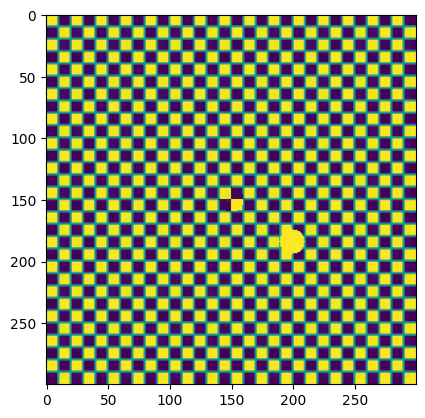

Predicted translation of focal point :  49 34
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  128.69343417595164
Angle :  -0.7853981633974484
[[[63 71]]

 [[64 70]]

 [[65 70]]

 [[66 71]]

 [[65 72]]

 [[64 72]]]
(195, 211)  are the new centers 
predicted center of the new focal length is highlighed in red


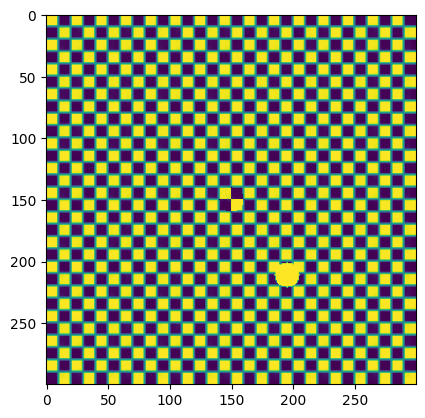

Predicted translation of focal point :  45 61
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  118.1905241548577
Angle :  -0.7435065183015194
[[[60 68]]

 [[61 67]]

 [[62 68]]

 [[61 69]]]
(184, 202)  are the new centers 
predicted center of the new focal length is highlighed in red


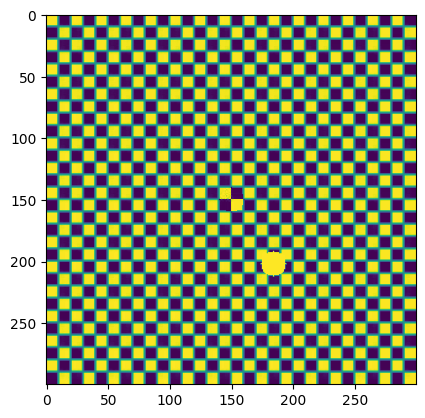

Predicted translation of focal point :  34 52
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  122.42957159118053
Angle :  -0.7449577957898783
[[[70 64]]

 [[71 63]]

 [[72 64]]

 [[72 65]]

 [[71 66]]

 [[70 65]]]
(214, 191)  are the new centers 
predicted center of the new focal length is highlighed in red


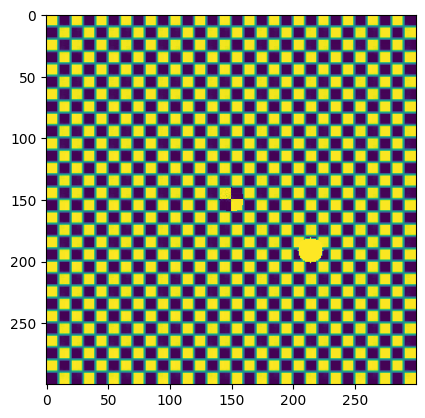

Predicted translation of focal point :  64 41
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  118.1905241548577
Angle :  -0.8272898084933772
[[[67 62]]

 [[69 62]]

 [[70 63]]

 [[70 64]]

 [[69 65]]

 [[69 68]]

 [[68 69]]

 [[65 69]]

 [[64 70]]

 [[63 70]]

 [[62 69]]

 [[62 67]]]
(199, 190)  are the new centers 
predicted center of the new focal length is highlighed in red


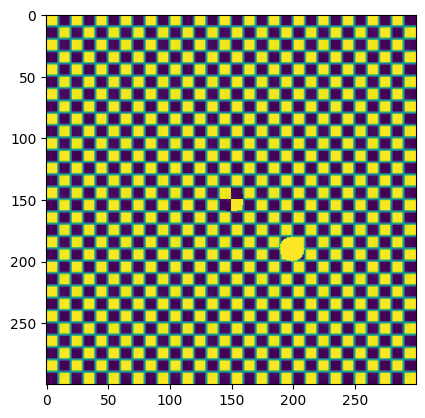

Predicted translation of focal point :  49 40
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  124.45079348883236
Angle :  -0.7853981633974484
[[[67 61]]

 [[68 60]]

 [[69 61]]

 [[68 62]]]
(205, 181)  are the new centers 
predicted center of the new focal length is highlighed in red


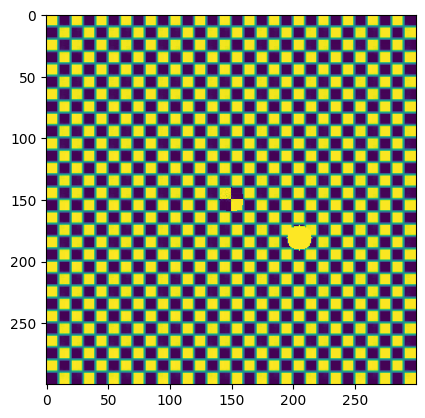

Predicted translation of focal point :  55 31
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  122.42957159118053
Angle :  -0.8258385310050184
[[[49 47]]

 [[47 49]]

 [[48 50]]

 [[49 50]]

 [[50 51]]

 [[50 52]]

 [[49 53]]

 [[51 53]]

 [[51 52]]

 [[52 51]]

 [[53 51]]

 [[53 49]]

 [[52 50]]

 [[50 50]]

 [[49 49]]]
(151, 144)  are the new centers 
predicted center of the new focal length is highlighed in red


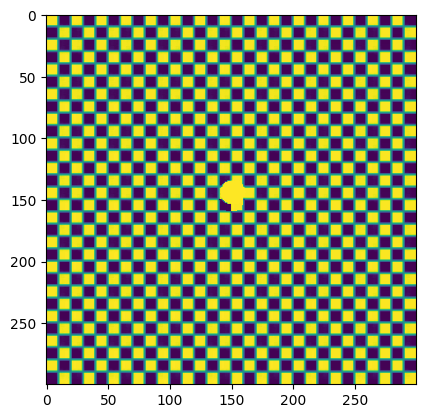

Predicted translation of focal point :  1 -6
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  145.6639969244288
Angle :  -0.7853981633974482
[[[50 51]]

 [[51 50]]

 [[52 51]]

 [[51 52]]]
(154, 151)  are the new centers 
predicted center of the new focal length is highlighed in red


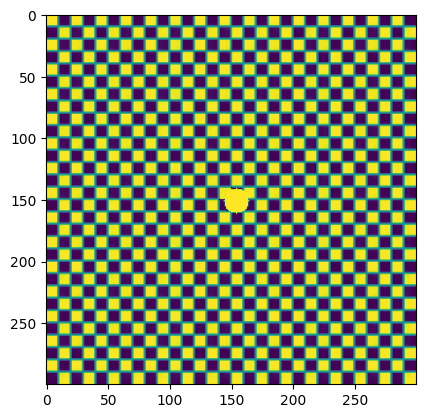

Predicted translation of focal point :  4 1
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  141.4213562373095
Angle :  -0.7853981633974482
Region with focal radius : 20




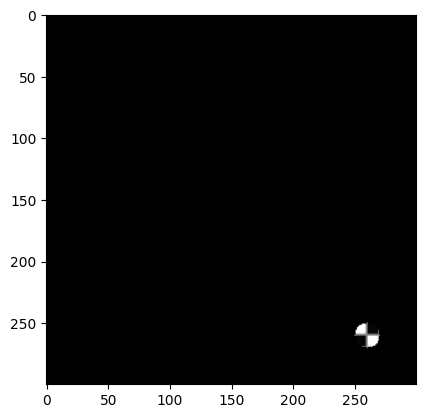

Test image with radius  20  being sharp with rest as blurred


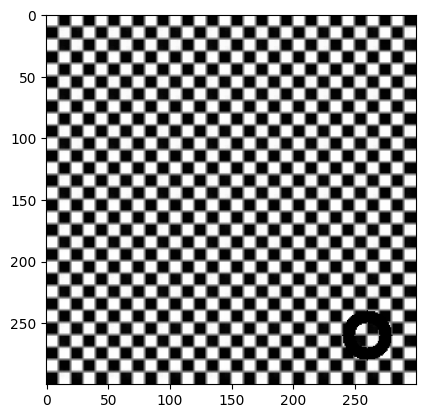

difference in test image and filtered non blurred region (in circular fasion)


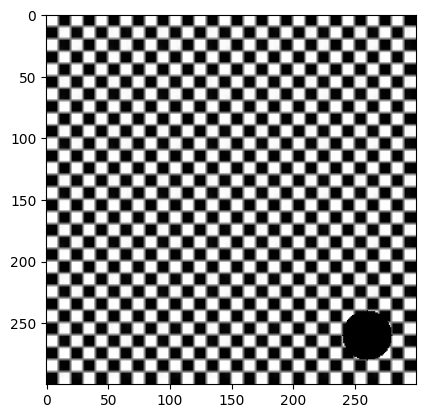

Visualization of separation of non blurred and blurred parts (radius = fr)


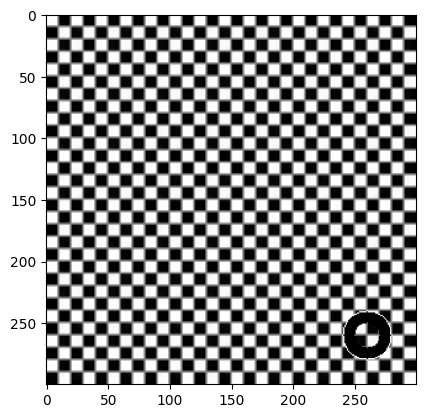

Laplacian Edge Mask


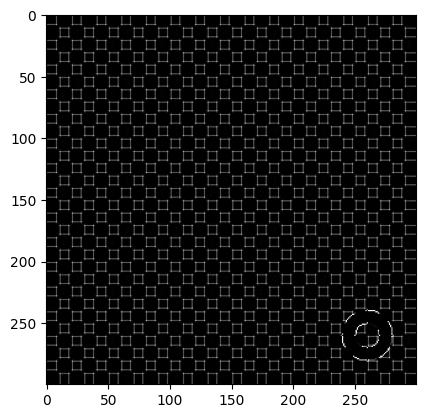

L O G edge mask


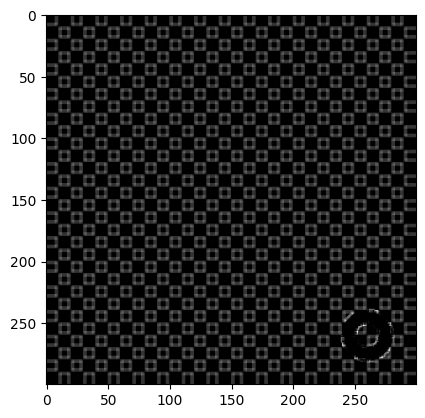

Variance mask : 


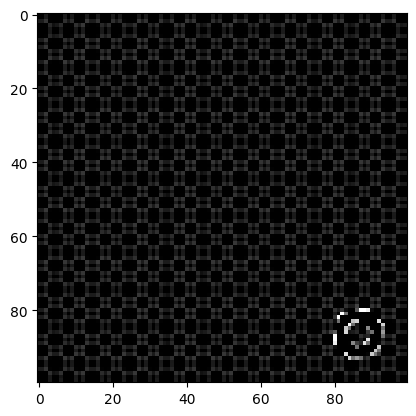

difference in variance maps


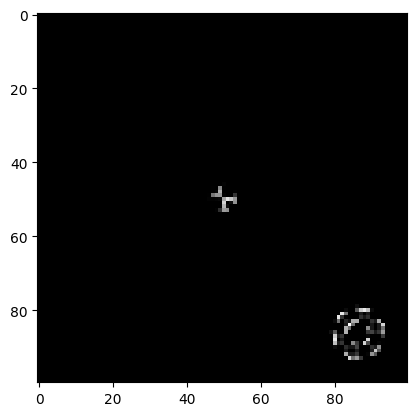

[[[86 79]]

 [[86 80]]

 [[87 81]]

 [[87 82]]

 [[86 83]]

 [[83 83]]

 [[82 82]]

 [[83 81]]

 [[83 80]]

 [[80 83]]

 [[81 83]]

 [[82 82]]

 [[83 83]]

 [[83 86]]

 [[82 87]]

 [[81 87]]

 [[80 86]]

 [[79 86]]

 [[80 87]]

 [[80 90]]

 [[81 89]]

 [[82 89]]

 [[83 90]]

 [[83 92]]

 [[84 93]]

 [[87 93]]

 [[86 92]]

 [[86 90]]

 [[87 89]]

 [[89 89]]

 [[90 90]]

 [[90 91]]

 [[89 92]]

 [[91 92]]

 [[92 91]]

 [[92 89]]

 [[91 90]]

 [[90 90]]

 [[89 89]]

 [[89 87]]

 [[90 86]]

 [[92 86]]

 [[93 87]]

 [[93 84]]

 [[92 83]]

 [[90 83]]

 [[89 82]]

 [[89 81]]

 [[90 80]]

 [[87 80]]]
(259, 244)  are the new centers 
predicted center of the new focal length is highlighed in red


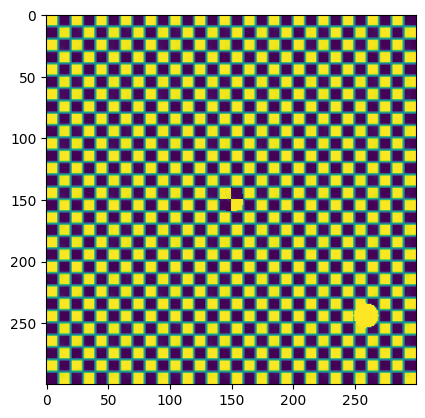

Predicted translation of focal point :  109 94
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  100.40916292848975
Angle :  -0.7853981633974484
[[[83 91]]

 [[84 90]]

 [[85 90]]

 [[86 91]]

 [[85 92]]

 [[84 92]]]
(255, 271)  are the new centers 
predicted center of the new focal length is highlighed in red


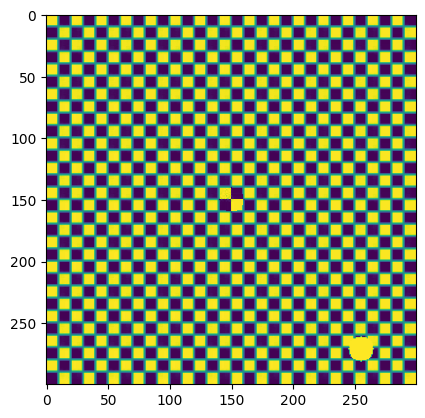

Predicted translation of focal point :  105 121
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  89.9388681271896
Angle :  -0.7303357680237781
[[[80 88]]

 [[81 87]]

 [[82 88]]

 [[81 89]]]
(244, 262)  are the new centers 
predicted center of the new focal length is highlighed in red


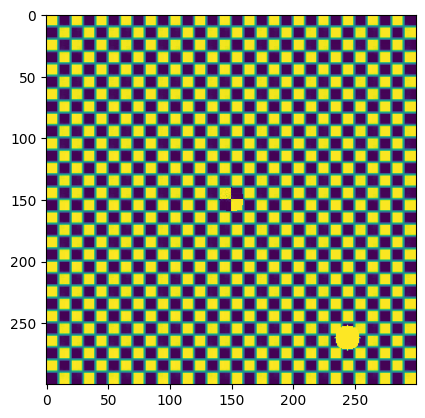

Predicted translation of focal point :  94 112
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  94.17536832951598
Angle :  -0.7328151017865066
[[[90 84]]

 [[91 83]]

 [[92 84]]

 [[92 85]]

 [[91 86]]

 [[90 85]]]
(274, 251)  are the new centers 
predicted center of the new focal length is highlighed in red


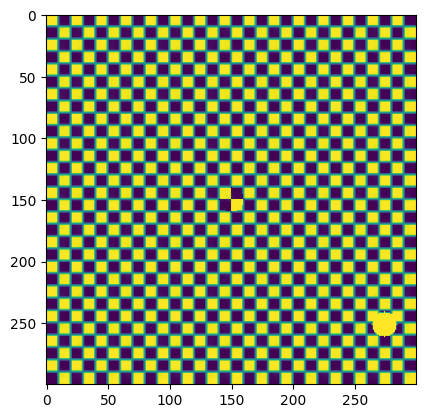

Predicted translation of focal point :  124 101
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  89.9388681271896
Angle :  -0.8404605587711186
[[[87 82]]

 [[89 82]]

 [[90 83]]

 [[90 84]]

 [[89 85]]

 [[89 88]]

 [[88 89]]

 [[85 89]]

 [[84 90]]

 [[83 90]]

 [[82 89]]

 [[82 87]]]
(259, 250)  are the new centers 
predicted center of the new focal length is highlighed in red


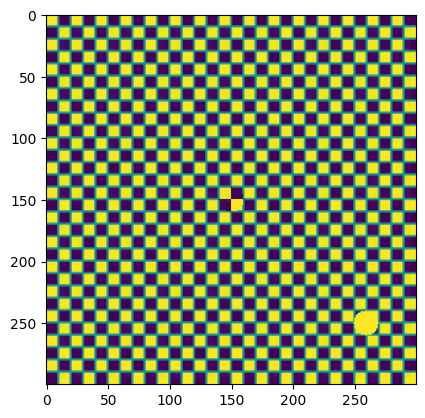

Predicted translation of focal point :  109 100
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  96.16652224137046
Angle :  -0.7853981633974484
[[[87 81]]

 [[88 80]]

 [[89 81]]

 [[88 82]]]
(265, 241)  are the new centers 
predicted center of the new focal length is highlighed in red


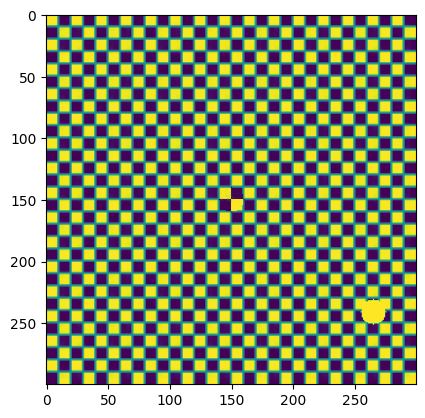

Predicted translation of focal point :  115 91
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  94.17536832951598
Angle :  -0.83798122500839
[[[49 47]]

 [[47 49]]

 [[48 50]]

 [[49 50]]

 [[50 51]]

 [[50 52]]

 [[49 53]]

 [[51 53]]

 [[51 52]]

 [[52 51]]

 [[53 51]]

 [[53 49]]

 [[52 50]]

 [[50 50]]

 [[49 49]]]
(151, 144)  are the new centers 
predicted center of the new focal length is highlighed in red


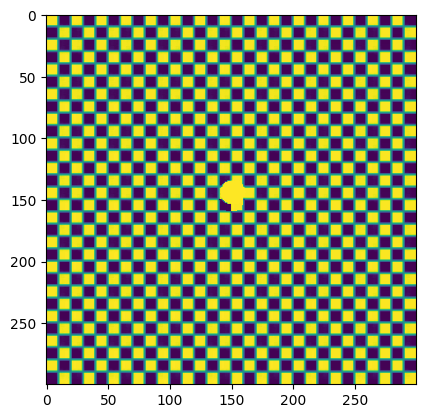

Predicted translation of focal point :  1 -6
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  145.6639969244288
Angle :  -0.7853981633974482
[[[50 51]]

 [[51 50]]

 [[52 51]]

 [[51 52]]]
(154, 151)  are the new centers 
predicted center of the new focal length is highlighed in red


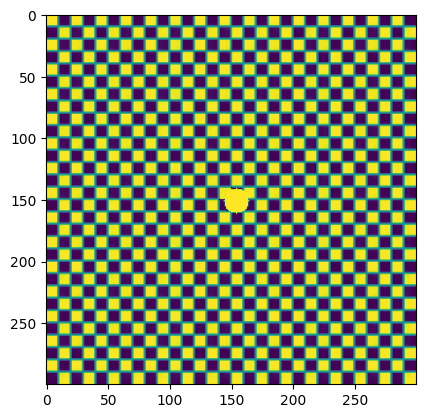

Predicted translation of focal point :  4 1
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  141.4213562373095
Angle :  -0.7853981633974482
Region with focal radius : 20




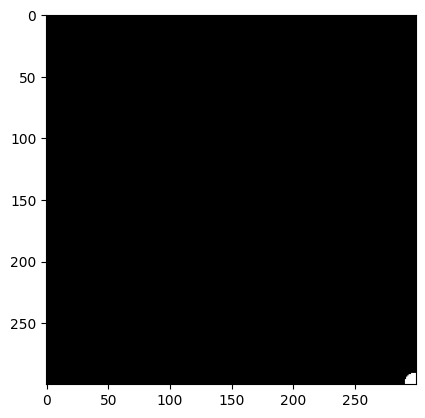

Test image with radius  20  being sharp with rest as blurred


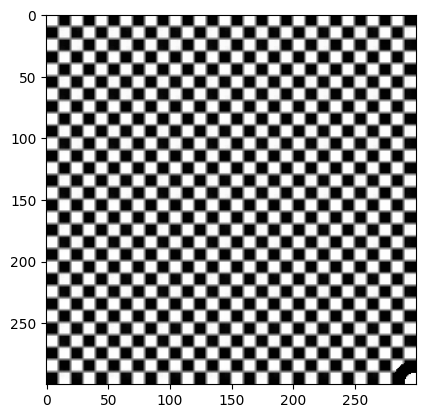

difference in test image and filtered non blurred region (in circular fasion)


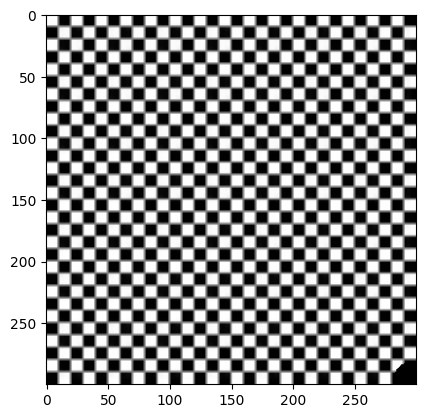

Visualization of separation of non blurred and blurred parts (radius = fr)


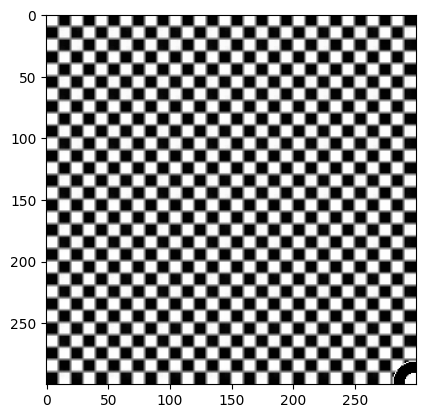

Laplacian Edge Mask


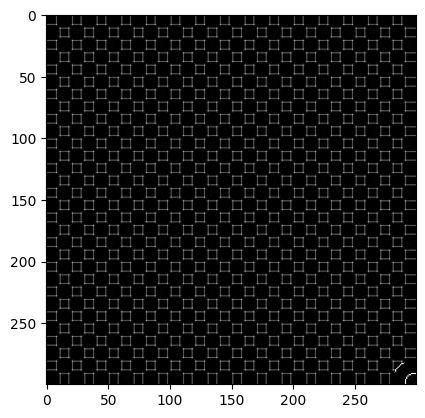

L O G edge mask


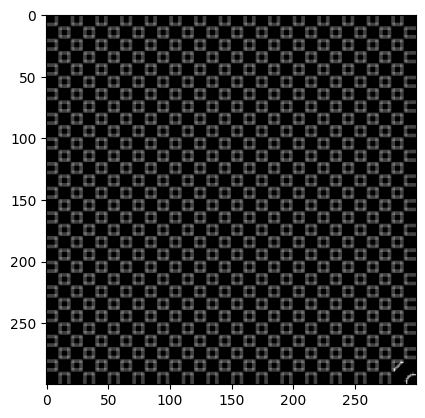

Variance mask : 


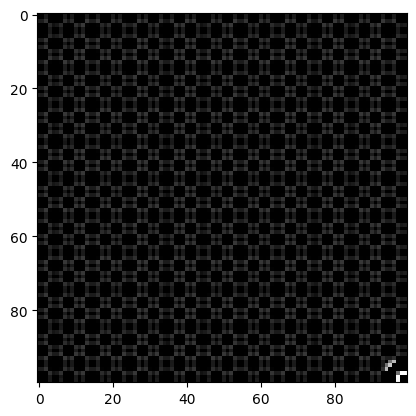

difference in variance maps


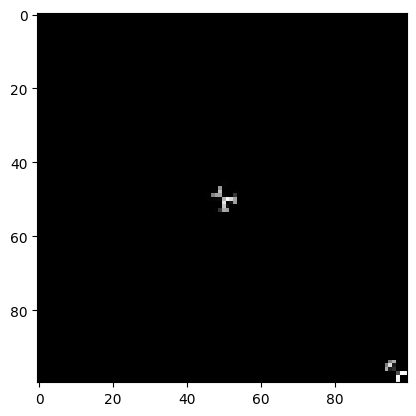

[[[95 94]]

 [[94 95]]

 [[94 96]]

 [[96 96]]

 [[97 97]]

 [[97 99]]

 [[97 98]]

 [[98 97]]

 [[99 97]]

 [[97 97]]

 [[96 96]]

 [[96 94]]]
(291, 285)  are the new centers 
predicted center of the new focal length is highlighed in red


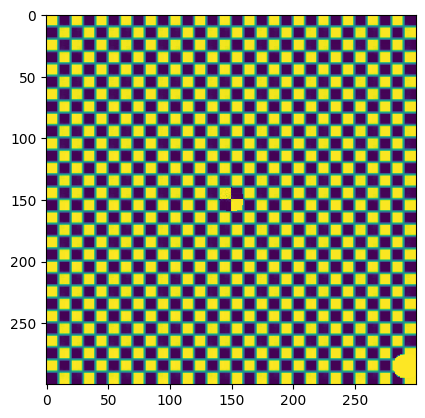

Predicted translation of focal point :  141 135
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  79.19595949289332
Angle :  -0.7853981633974484
[[[49 47]]

 [[47 49]]

 [[48 50]]

 [[49 50]]

 [[50 51]]

 [[50 52]]

 [[49 53]]

 [[51 53]]

 [[51 52]]

 [[52 51]]

 [[53 51]]

 [[53 49]]

 [[52 50]]

 [[50 50]]

 [[49 49]]]
(151, 144)  are the new centers 
predicted center of the new focal length is highlighed in red


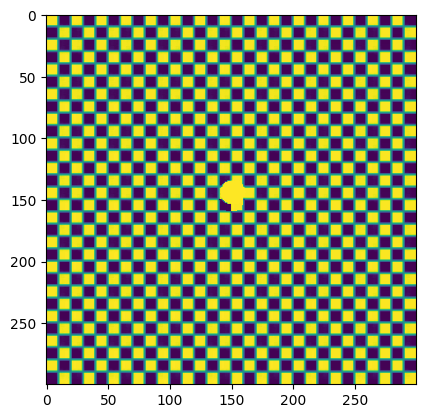

Predicted translation of focal point :  1 -6
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  145.6639969244288
Angle :  -0.7853981633974482
[[[50 51]]

 [[51 50]]

 [[52 51]]

 [[51 52]]]
(154, 151)  are the new centers 
predicted center of the new focal length is highlighed in red


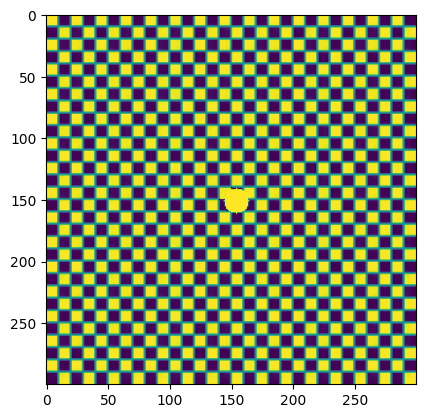

Predicted translation of focal point :  4 1
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  141.4213562373095
Angle :  -0.7853981633974482
------------------------------------------------------














In [16]:
focal_radiis = 10
translations = [-150,-110,-50,0,50,110,150]
original_image = image.copy()

for t  in translations:
    center = (CENTER[0]+t,CENTER[1]+t)

    fr = 20
    mask = np.zeros(IMG_DIMS, dtype=np.uint8)
    non_blurred_region = cv2.circle(mask, center, 10, (255, 255, 255), -1)
    non_blurred_region = cv2.bitwise_and(non_blurred_region, original_image)
    print('Region with focal radius : ' + str(fr) + '\n\n')
    plt.imshow(non_blurred_region, cmap='gray')
    plt.show()

    blurred_image_copy = blurred_image.copy()
    blurred_image_copy = cv2.circle(blurred_image_copy, center, fr, (0, 0, 0), -1)
    test_image = blurred_image_copy +  non_blurred_region
            
    print('Test image with radius ', fr, ' being sharp with rest as blurred')
    plt.imshow(test_image, cmap='gray')
    plt.show()
    print('difference in test image and filtered non blurred region (in circular fasion)')
    plt.imshow(test_image - non_blurred_region, cmap='gray')
    plt.show()
    print('Visualization of separation of non blurred and blurred parts (radius = fr)')
    test_image_copy = test_image.copy()
    plt.imshow(cv2.circle(test_image_copy, center, fr, (255, 0, 0), 1), cmap='gray')
    plt.show()

    laplacian_filter_8 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_8)
    
    print('Laplacian Edge Mask')
    plt.imshow(edge_mask, cmap='gray')
    plt.show()
    gaussian_image = cv2.GaussianBlur(test_image, (3, 3), 3)
    g_edge_mask = cv2.filter2D(gaussian_image, -1, laplacian_filter_8)
    print('L O G edge mask')
    plt.imshow(g_edge_mask, cmap='gray')
    plt.show()

    edge_map = g_edge_mask

    test_image_variances = []
    for x in range(0, IMG_DIMS[0]//3):
        for y in range(0, IMG_DIMS[1]//3):
            i = x * 3
            j = y * 3
            test_image_variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
            edge_mask[i+1,j+2]
            ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

    test_image_variances = np.array(test_image_variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)

    print('Variance mask : ')
    plt.imshow(test_image_variances, cmap='gray')
    plt.show()

    print('difference in variance maps')
    plt.imshow((abs(test_image_variances - variance_image)), cmap='gray')
    plt.show()


    # find contours
    absolute_diff_variance_map = abs(test_image_variances - variance_image)
    countours, b  = cv2.findContours(cv2.threshold(absolute_diff_variance_map, 255, 255, cv2.THRESH_BINARY)[1].astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for c in countours:
        print(c)
        # Find the center of all contours.
        #M = cv2.moments(c)
        #if (M["m00"] == 0):
        #     continue 
        #cX = int(M["m10"] / M["m00"])
        #cY = int(M["m01"] / M["m00"])

        x,y,w,h = cv2.boundingRect(c)

        
        focal_point_position = ((int)((x  + w/2) * 3), (int)((y + h/6) * 3)) 
        print(focal_point_position, ' are the new centers ')

        img = original_image.copy()

        print('predicted center of the new focal length is highlighed in red')
        plt.imshow(cv2.circle(img, focal_point_position, 10, (255, 0, 0), -1))
        plt.show()

        print('Predicted translation of focal point : ', focal_point_position[0] -  CENTER[0], focal_point_position[1] - CENTER[1])
        print('Actual translation : ', t)
        #print(variances)

        print("Correction parameters")

        print('Angle of rotation : ')
        _x = x - CENTER[0]
        _y = y - CENTER[1]
        r = np.sqrt(_x*_x + _y*_y)
        print('Radius : ', r)
        sin_theta = (_y) / r
        angle = np.arcsin(sin_theta)
        print('Angle : ', angle)



print('------------------------------------------------------\n\n\n\n\n\n\n\n\n\n\n\n')

#print(original_variances)